# Effects of isoproterenol

In [1]:
using ModelingToolkit
using OrdinaryDiffEq
using Plots
using CaMKIIModel
using CaMKIIModel: second, μM
Plots.default(lw=1.5)

In [2]:
sys = build_neonatal_ecc_sys(simplify=true, reduce_iso=true, reduce_camk=true)
tend = 500.0second
prob = ODEProblem(sys, [], tend)
stimstart = 100.0second
stimend = 300.0second
alg = TRBDF2()

TRBDF2(; linsolve = nothing, nlsolve = OrdinaryDiffEqNonlinearSolve.NLNewton{Rational{Int64}, Rational{Int64}, Rational{Int64}, Rational{Int64}}(1//100, 10, 1//5, 1//5, false, true, 0//1), precs = DEFAULT_PRECS, smooth_est = true, extrapolant = linear, controller = PI, step_limiter! = trivial_limiter!, autodiff = ADTypes.AutoForwardDiff(),)

## Without isoproterenol

In [3]:
@unpack Istim = sys
callback = build_stim_callbacks(Istim, stimend; period=1second, starttime=stimstart)
@time sol = solve(prob, alg; callback)

  9.982731 seconds (21.47 M allocations: 1.005 GiB, 3.48% gc time, 74.00% compilation time)


retcode: Success
Interpolation: 3rd order Hermite
t: 22357-element Vector{Float64}:
      0.0
      0.00037376965588217846
      0.004111466214703963
      0.03981907054375368
      0.06090491262855715
      0.1655435225566852
      0.2409336011179059
      0.5227875405036884
      1.0858597487365014
      2.388889121726196
      ⋮
 480346.9749024962
 482699.7883395445
 485052.6017765928
 487499.69929415866
 490270.4874344493
 493041.27557473996
 495812.0637150306
 498582.85185532126
 500000.0
u: 22357-element Vector{Vector{Float64}}:
 [0.0026, 830.0, 830.0, 0.00702, 0.966, 0.22156, 0.09243, 0.00188, 0.00977, 0.26081  …  0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, -68.79268, 13838.37602, 150952.75035000002]
 [0.0025999722040421203, 829.9999902796054, 829.9999993331091, 0.007020004989170199, 0.9660000353355825, 0.22156007721482085, 0.09242995488968388, 0.0018799969383422777, 0.009769997724445615, 0.2608099143344817  …  0.12113, 0.12113, 0.12113, 0.12113, 0.12113000000

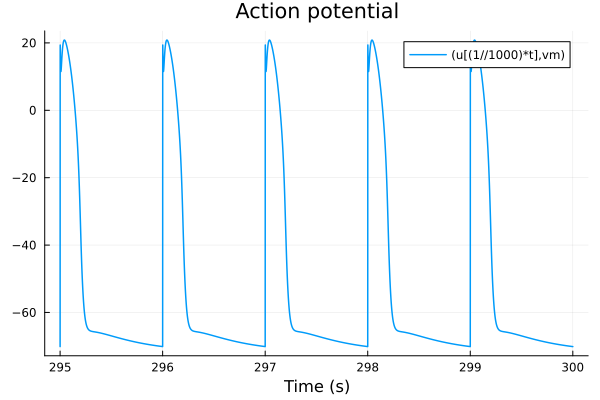

In [4]:
i = (sys.t/1000, sys.vm)
plot(sol, idxs=i, tspan=(295second, 300second), title="Action potential", xlabel="Time (s)")

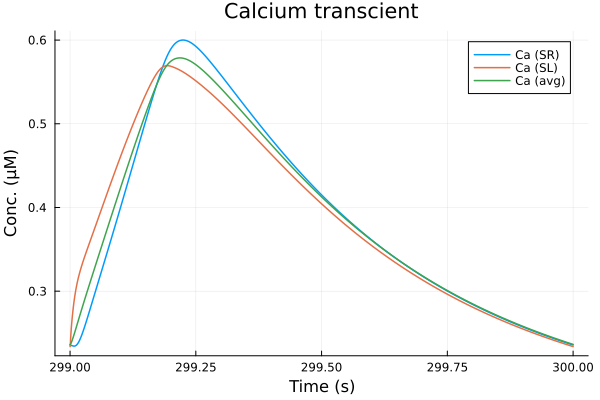

In [5]:
plot(sol, idxs=(sys.t/1000, [sys.Cai_sub_SR, sys.Cai_sub_SL, sys.Cai_mean]), tspan=(299second, 300second), title="Calcium transcient", xlabel="Time (s)", ylabel="Conc. (μM)", label=["Ca (SR)" "Ca (SL)" "Ca (avg)"])

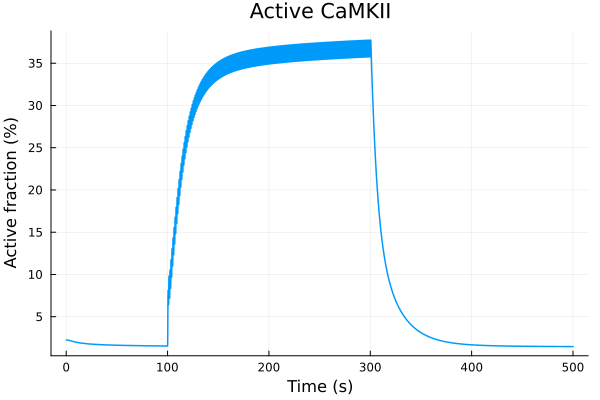

In [6]:
plot(sol, idxs=(sys.t/1000, sys.CaMKAct*100), title="Active CaMKII", label=false, ylabel="Active fraction (%)" , xlabel="Time (s)")

## 0.1uM isoproterenol

In [7]:
prob2 = remake(prob, p=[sys.ISO => 0.1μM])
sol2 = solve(prob2, alg; callback)

retcode: Success
Interpolation: 3rd order Hermite
t: 24672-element Vector{Float64}:
      0.0
      0.0003737343848581722
      0.004111078233439894
      0.039816339706127295
      0.060900752777357826
      0.16553476226263736
      0.24091875673065616
      0.5229648546728856
      1.0863777736793474
      2.413405322158768
      ⋮
 480066.1248874634
 481361.1827093272
 482835.17229020357
 485399.71347236686
 488504.4036737538
 490428.8143975678
 494101.0270270934
 497730.1337078878
 500000.0
u: 24672-element Vector{Vector{Float64}}:
 [0.0026, 830.0, 830.0, 0.00702, 0.966, 0.22156, 0.09243, 0.00188, 0.00977, 0.26081  …  0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, 0.12113, -68.79268, 13838.37602, 150952.75035000002]
 [0.002599972204967437, 829.9999902808163, 830.000028847142, 0.007020004990365181, 0.9660000353322494, 0.22156007720753526, 0.09242995489394132, 0.0018799969394408657, 0.00976999772463838, 0.2608099143421562  …  0.12113, 0.12113, 0.12113, 0.12113, 0.121130000000

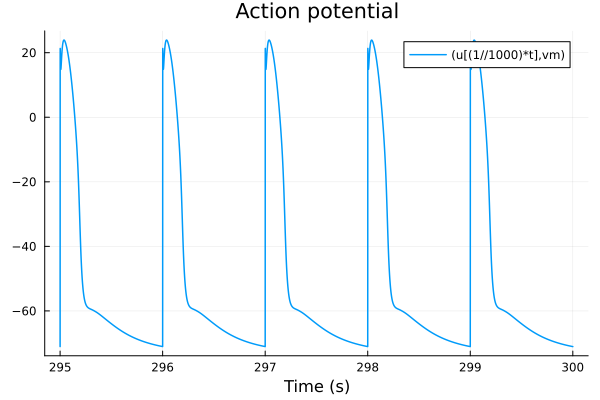

In [8]:
plot(sol2, idxs=(sys.t/1000, sys.vm), tspan=(295second, 300second), title="Action potential", xlabel="Time (s)")

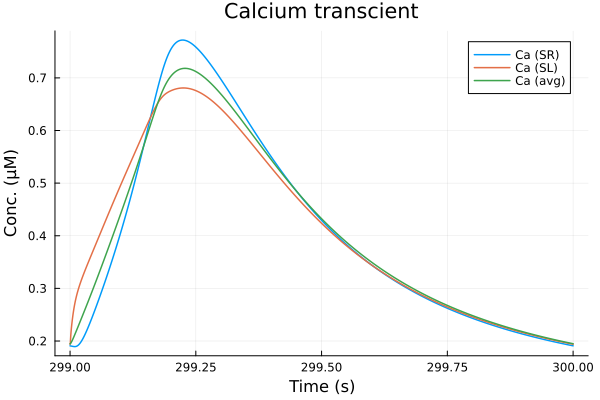

In [9]:
plot(sol2, idxs=(sys.t/1000, [sys.Cai_sub_SR, sys.Cai_sub_SL, sys.Cai_mean]), tspan=(299second, 300second), title="Calcium transcient", xlabel="Time (s)", ylabel="Conc. (μM)", label=["Ca (SR)" "Ca (SL)" "Ca (avg)"])

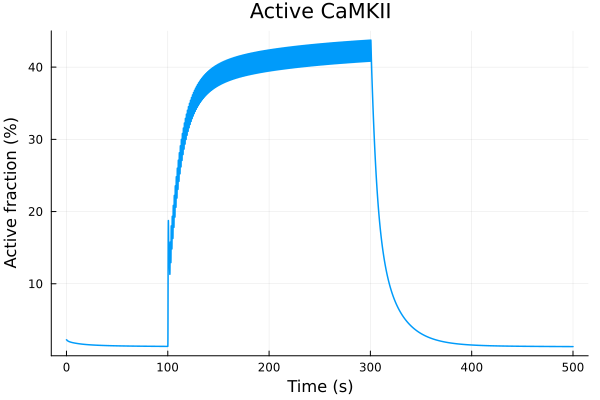

In [10]:
plot(sol2, idxs=(sys.t/1000, sys.CaMKAct*100), title="Active CaMKII", label=false, ylabel="Active fraction (%)" , xlabel="Time (s)")

## Comparison

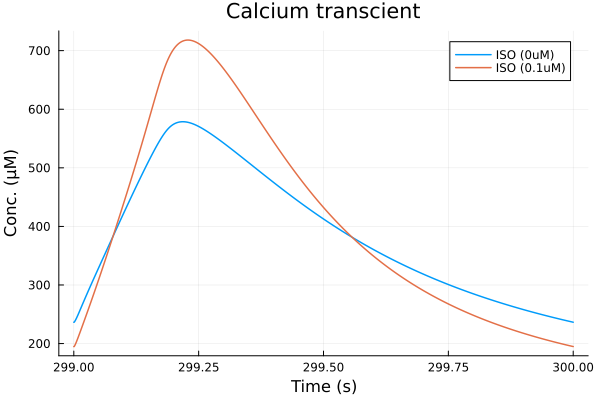

In [11]:
i = (sys.t/1000, sys.Cai_mean * 1000)
tspan = (299second, 300second)
plot(sol, idxs=i, title="Calcium transcient", lab="ISO (0uM)"; tspan)
plot!(sol2, idxs=i, lab="ISO (0.1uM)", xlabel="Time (s)", ylabel="Conc. (μM)"; tspan)

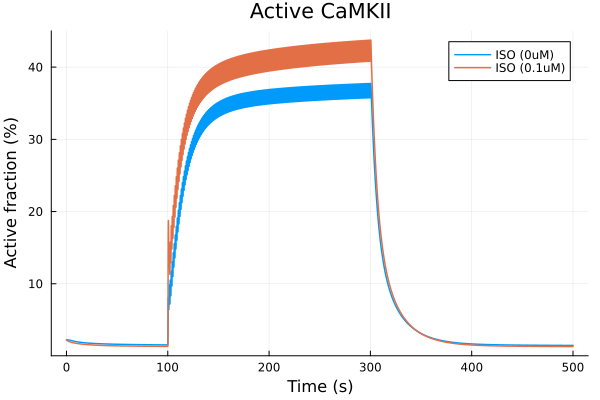

In [12]:
i = (sys.t/1000, sys.CaMKAct*100)
plot(sol, idxs=i, title="Active CaMKII", lab="ISO (0uM)")
plot!(sol2, idxs=i, lab="ISO (0.1uM)", ylabel="Active fraction (%)" , xlabel="Time (s)")

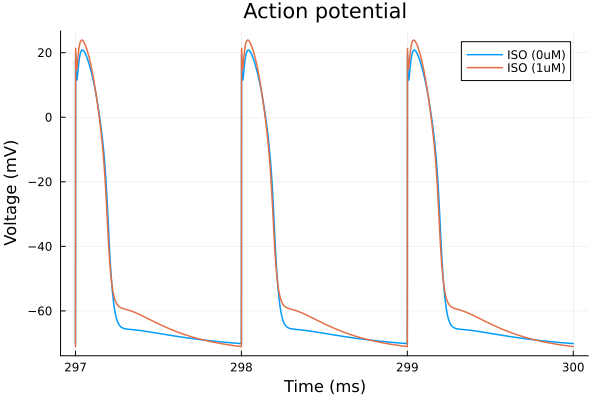

In [13]:
i = (sys.t/1000, sys.vm)
plot(sol, idxs=i, tspan=(297second, 300second), title="Action potential", lab="ISO (0uM)")
plot!(sol2, idxs=i, tspan=(297second, 300second), lab="ISO (1uM)", xlabel="Time (ms)", ylabel="Voltage (mV)")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*